In [1]:
# packages importeren 
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# dataset inladen en omzetten in pandas dataframe
df = pd.read_csv('klachten.csv')
# Target variable definiëren
y = df['Product']

In [3]:
# Train-test split
train_df, test_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=y
)

## Basis analyse

In [4]:
# Aantal kolommen en rijen in de train dataset
train_df.shape
print("De dataset bevat {} rijen en {} kolommen.".format(train_df.shape[0], train_df.shape[1]))

De dataset bevat 10420 rijen en 5 kolommen.


In [5]:
# Eerste vijf rijen van de trainingsset bekijken
train_df.head().T

,8835,6482,12354,2315,6740
ID,1580972,1691558,1776634,1387917,1522980
Datum_ontvangst,2023-09-25,2023-12-10,2024-02-07,2023-05-21,2023-08-17
Product,Incasso,Hypotheek,Kredietregistratie,Consumentenkrediet,Hypotheek
Omschrijving,i have just received a copy of my credit repor...,Paid {$420.00} for appraisal on home based upo...,TransUnion is reporting a XXXX XXXX on my cred...,"To begin with, prior to entering into a vehicl...",PNC Mortgage sent {$1500.00} to an insurance c...
Antwoord_bedrijf,Closed with explanation,Closed with explanation,Closed with non-monetary relief,Closed with non-monetary relief,Closed with explanation


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14887.0,1.902949e+06,341759.949815,1290157.0,1602145.5,1923756.0,2205762.5,2543247.0


ID voegt geen voorspellende waarde toe. TODO: droppen ID kolom 

In [7]:
# Datatypes en null-waarden in de trainingsset bekijken
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10420 entries, 8835 to 12191
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                10420 non-null  int64 
 1   Datum_ontvangst   10420 non-null  object
 2   Product           10420 non-null  object
 3   Omschrijving      10420 non-null  object
 4   Antwoord_bedrijf  10420 non-null  object
dtypes: int64(1), object(4)
memory usage: 488.4+ KB


Er zitten geen nullwaardes in de trainset. Alle variabelen behalve ID zijn van het object type (tekst)

## Analyses per feature

#### `Product` feature

In [8]:
# Verdeling van de Product-sectoren in de trainingsset
train_df['Product'].value_counts()

Product
Incasso               2865
Hypotheek             2320
Kredietregistratie    2211
Creditcard            1319
Bankrekening          1042
Consumentenkrediet     663
Name: count, dtype: int64

Text(0.5, 1.0, 'Aantal klachten per product sector')

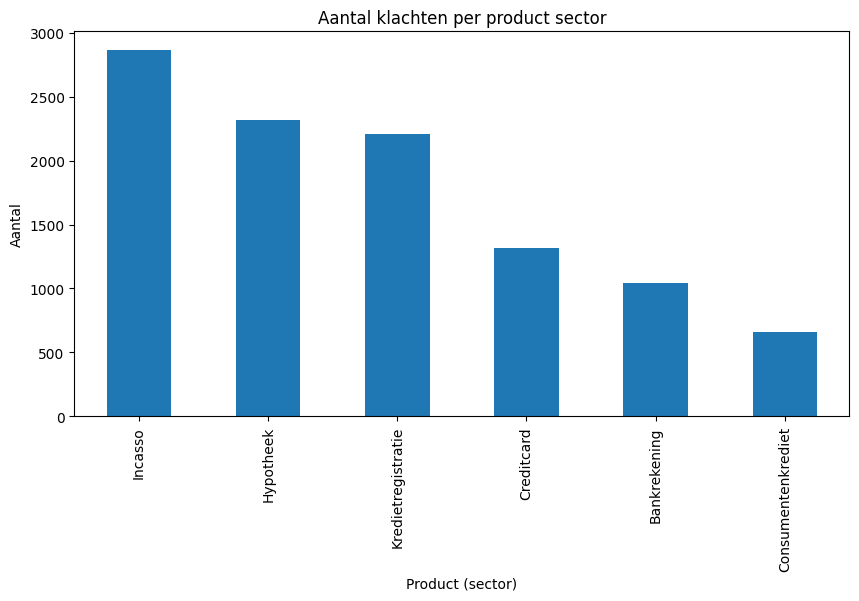

In [ ]:
counts_product = train_df['Product'].value_counts() # tellen hoeveel klachten per product sector

# plotten barchart 
ax = counts_product.plot(kind='bar', figsize=(10,5))
ax.set_xlabel("Product (sector)")
ax.set_ylabel("Aantal")
ax.set_title("Aantal klachten per product sector")

De sector met de meeste klachten in de trainset is 'Incasso'

#### `Omschrijving` feature

In [11]:
# Statistische informatie over de lengte van de klachtenbeschrijvingen
exploratie_df = train_df.copy()
exploratie_df['len'] = exploratie_df['Omschrijving'].str.len()
exploratie_df['len'].describe().round(2)

count    10420.00
mean      1016.16
std        910.31
min         12.00
25%        375.00
50%        709.00
75%       1354.00
max      10761.00
Name: len, dtype: float64

In [ ]:
# Gemiddelde lengte van klachtenbeschrijvingen per product sector
exploratie_df.groupby('Product')['len'].mean().round(2)

Product
Bankrekening          1205.74
Consumentenkrediet    1059.79
Creditcard            1130.99
Hypotheek             1426.86
Incasso                770.72
Kredietregistratie     732.31
Name: len, dtype: float64

In [ ]:
# Aantal duplicaten in omschrijving tellen
train_df['Omschrijving'].duplicated().sum()

np.int64(39)

In [ ]:
# Rijen met duplicaten selecteren
explore_duplicates = train_df.loc[
    train_df['Omschrijving'].duplicated(keep=False)
].copy()

# Sorteren zodat de duplicates bij elkaar staan 
explore_duplicates = explore_duplicates.sort_values('Omschrijving')

explore_duplicates

,ID,Datum_ontvangst,Product,Omschrijving,Antwoord_bedrijf
12143,2152667,2024-10-08,Kredietregistratie,Experian is not responding to my requests to i...,Closed with explanation
13552,2096759,2024-09-07,Kredietregistratie,Experian is not responding to my requests to i...,Closed with explanation
12663,2362106,2025-02-27,Kredietregistratie,I am a victim of identity theft. There is Frau...,Closed with explanation
13124,2361993,2025-02-27,Kredietregistratie,I am a victim of identity theft. There is Frau...,Closed with explanation
14408,2041468,2024-08-02,Kredietregistratie,I am filing this complaint because Equifax has...,Closed with explanation
...,...,...,...,...,...
10536,1403881,2023-06-03,Incasso,This debt is not known to me. I recently reque...,Closed with explanation
14599,1510127,2023-08-09,Kredietregistratie,"While checking my personal credit report, I no...",Closed with non-monetary relief
13778,1509808,2023-08-08,Kredietregistratie,"While checking my personal credit report, I no...",Closed with non-monetary relief
12564,1510152,2023-08-09,Kredietregistratie,"While checking my personal credit report, I no...",Closed with explanation


#### `Antwoord_bedrijf` feature

In [15]:
train_df['Antwoord_bedrijf'].value_counts()

Antwoord_bedrijf
Closed with explanation            8155
Closed with non-monetary relief    1207
Closed with monetary relief         735
Closed                              251
Untimely response                    72
Name: count, dtype: int64

#### `Datum_ontvangst` feature

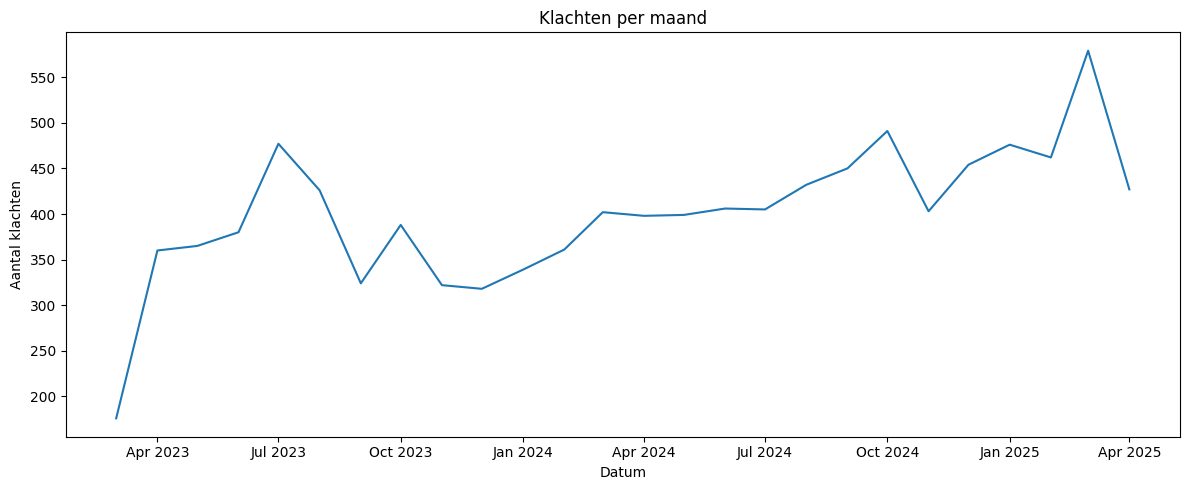

In [ ]:
train_df['Datum_ontvangst'] = pd.to_datetime(train_df['Datum_ontvangst']) # values omzetten naar datetime objecten 
counts = train_df.groupby(train_df['Datum_ontvangst'].dt.to_period('M')).size() # groeperen op jaar-maand en aantallen per maand tellen 
counts.index = counts.index.to_timestamp() 

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(counts.index, counts.values)

# maand - jaar labels 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Klachten per maand")
plt.xlabel("Datum")
plt.ylabel("Aantal klachten")
plt.tight_layout()
plt.show()